# mantismash tracks data extract

In [1]:
import spotipy
import json
import time
import sys
import pandas as pd
import numpy as np

In [2]:
from spotipy.oauth2 import SpotifyClientCredentials #To access authorised Spotify data
client_id = 'e2259109005e4bca90a98a851f042e7e'
client_secret = '7a39ee07c96d451298fa86308bd66ae0'

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

In [4]:
name = "mantismash" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/7DWz1Cj7HZrwBs7kraQqAm'},
  'href': 'https://api.spotify.com/v1/artists/7DWz1Cj7HZrwBs7kraQqAm',
  'id': '7DWz1Cj7HZrwBs7kraQqAm',
  'name': 'MantisMash',
  'type': 'artist',
  'uri': 'spotify:artist:7DWz1Cj7HZrwBs7kraQqAm'}]

In [5]:
#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']

#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')

#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])

In [6]:
album_uris

['spotify:album:6FIko195qO4Pw8iksM4HEE',
 'spotify:album:0wdarjn4AFIIQhXUvYojcx',
 'spotify:album:2ZlmLDmGbbUt9k8yPxu73i',
 'spotify:album:61YcAlRL8vNa83fN2urYl7']

In [7]:
album_names

['Inspectral', 'Omnipresent', 'Meraki', 'Simplexity']

### get tracks ids

In [8]:
tids = []
t_names = []
for i, t in enumerate(result['tracks']['items']):
    print(' ', i, t['name'])
    t_names.append(t['name'])
    tids.append(t['uri'])

  0 Mekong Drifters
  1 Wonky Floor
  2 Tourbass
  3 Psychonauts Temple
  4 Saigon Haze
  5 Cosmic Piper
  6 Kali Ma
  7 Kahwa Dub
  8 Ocean of Clouds
  9 Kasmanaft


In [9]:
t_names

['Mekong Drifters',
 'Wonky Floor',
 'Tourbass',
 'Psychonauts Temple',
 'Saigon Haze',
 'Cosmic Piper',
 'Kali Ma',
 'Kahwa Dub',
 'Ocean of Clouds',
 'Kasmanaft']

In [10]:
start = time.time()
features = sp.audio_features(tids)
delta = time.time() - start
print("time to get the data = ",delta)

time to get the data =  0.3188204765319824


In [11]:
len(features)

10

In [12]:
features[0]

{'danceability': 0.82,
 'energy': 0.541,
 'key': 0,
 'loudness': -8.603,
 'mode': 0,
 'speechiness': 0.0502,
 'acousticness': 0.283,
 'instrumentalness': 0.874,
 'liveness': 0.101,
 'valence': 0.239,
 'tempo': 124.013,
 'type': 'audio_features',
 'id': '1pT8xIukhRvFJJZNCSbChL',
 'uri': 'spotify:track:1pT8xIukhRvFJJZNCSbChL',
 'track_href': 'https://api.spotify.com/v1/tracks/1pT8xIukhRvFJJZNCSbChL',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1pT8xIukhRvFJJZNCSbChL',
 'duration_ms': 445000,
 'time_signature': 4}

In [13]:
features[0]['danceability']

0.82

# check about popularity **************************

In [14]:
t_popularity = []
for track in tids:
    pop = sp.track(track)
    # pop is a dict with many attributes, we are interested at the moment in popularity
    t_popularity.append(pop['popularity'])

In [15]:
def get_tracks_features_into_dict(tracks_features):
    t_id = []
    t_danceability = []
    t_energy = []
    t_loudness = []
    t_speechiness = []
    t_acousticness = []
    t_instrumentalness = []
    t_liveness = []
    t_valence = []
    t_tempo = []
    t_duration_ms = []
    for i in range(len(t_names)):
        t_id.append(tracks_features[i]['id'])
        t_danceability.append(tracks_features[i]['danceability'])
        t_energy.append(tracks_features[i]['energy'])
        t_loudness.append(tracks_features[i]['loudness'])
        t_speechiness.append(tracks_features[i]['speechiness'])
        t_acousticness.append(tracks_features[i]['acousticness'])
        t_instrumentalness.append(tracks_features[i]['instrumentalness'])
        t_liveness.append(tracks_features[i]['liveness'])
        t_valence.append(tracks_features[i]['valence'])
        t_tempo.append(tracks_features[i]['tempo'])
        t_duration_ms.append(tracks_features[i]['duration_ms'])
    #create a dictionary    
    d = {'id':t_id,
         'danceability':t_danceability,
         'energy':t_energy,
         'loudness':t_loudness,
         'speechiness':t_speechiness,
         'acousticness':t_acousticness,
         'instrumentalness':t_instrumentalness,
         'liveness':t_liveness,
         'valence':t_valence,
         'tempo':t_tempo,
         'duration_ms':t_duration_ms
    }
    
    return d

In [16]:
songs_features_dict = get_tracks_features_into_dict(features)

In [17]:
songs_features_dict

{'id': ['1pT8xIukhRvFJJZNCSbChL',
  '7r5kNKIVjZoak8RVdnq5an',
  '0fjhXPjlLOJPcbYIzSw4Zl',
  '4mslBDDvZbWSW6PRCfZqXV',
  '3wCCCf7kHM9EaEj3NEPECV',
  '6CoDK9CeA2ohpPNE5jCk6Y',
  '7kGErpXASxvZQTk5m1FfZ7',
  '66HlVZYHJgGw1C61kbkLFW',
  '6veoMkqzEwhzV9VHkMZ1jf',
  '1LjBdXAAoJdxflnJKTZiab'],
 'danceability': [0.82,
  0.708,
  0.574,
  0.59,
  0.71,
  0.796,
  0.654,
  0.732,
  0.325,
  0.836],
 'energy': [0.541,
  0.609,
  0.621,
  0.757,
  0.415,
  0.607,
  0.58,
  0.68,
  0.637,
  0.562],
 'loudness': [-8.603,
  -8.494,
  -10.323,
  -8.28,
  -10.029,
  -8.798,
  -8.561,
  -8.482,
  -9.472,
  -9.202],
 'speechiness': [0.0502,
  0.233,
  0.0556,
  0.08,
  0.202,
  0.063,
  0.0743,
  0.085,
  0.0496,
  0.128],
 'acousticness': [0.283,
  0.0337,
  0.0137,
  0.104,
  0.106,
  0.222,
  0.163,
  0.0306,
  0.016,
  0.138],
 'instrumentalness': [0.874,
  0.738,
  0.827,
  0.698,
  0.756,
  0.838,
  0.71,
  0.822,
  0.536,
  0.636],
 'liveness': [0.101,
  0.0745,
  0.855,
  0.184,
  0.202,
  0.0901,

## create dataframe

In [18]:
df = pd.DataFrame(songs_features_dict)
df.head()

,id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1pT8xIukhRvFJJZNCSbChL,0.820,0.541,-8.603,0.0502,0.2830,0.874,0.1010,0.239,124.013,445000
1,7r5kNKIVjZoak8RVdnq5an,0.708,0.609,-8.494,0.2330,0.0337,0.738,0.0745,0.344,185.972,430000
2,0fjhXPjlLOJPcbYIzSw4Zl,0.574,0.621,-10.323,0.0556,0.0137,0.827,0.8550,0.382,180.044,416000
3,4mslBDDvZbWSW6PRCfZqXV,0.590,0.757,-8.280,0.0800,0.1040,0.698,0.1840,0.295,159.962,486000
4,3wCCCf7kHM9EaEj3NEPECV,0.710,0.415,-10.029,0.2020,0.1060,0.756,0.2020,0.433,172.002,390698


In [19]:
df.insert(11, "popularity", pd.Series(t_popularity) , True) 

# we define ourselves the tracks types based on our knowledge

In [20]:
df.insert(12, "track_type", 'chill glitch' , True)
df = df.set_index('id')

In [21]:
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity,track_type
id,,,,,,,,,,,,
1pT8xIukhRvFJJZNCSbChL,0.820,0.541,-8.603,0.0502,0.2830,0.874,0.1010,0.2390,124.013,445000,18,chill glitch
7r5kNKIVjZoak8RVdnq5an,0.708,0.609,-8.494,0.2330,0.0337,0.738,0.0745,0.3440,185.972,430000,15,chill glitch
0fjhXPjlLOJPcbYIzSw4Zl,0.574,0.621,-10.323,0.0556,0.0137,0.827,0.8550,0.3820,180.044,416000,15,chill glitch
4mslBDDvZbWSW6PRCfZqXV,0.590,0.757,-8.280,0.0800,0.1040,0.698,0.1840,0.2950,159.962,486000,14,chill glitch
3wCCCf7kHM9EaEj3NEPECV,0.710,0.415,-10.029,0.2020,0.1060,0.756,0.2020,0.4330,172.002,390698,13,chill glitch
6CoDK9CeA2ohpPNE5jCk6Y,0.796,0.607,-8.798,0.0630,0.2220,0.838,0.0901,0.4420,115.502,398961,13,chill glitch
7kGErpXASxvZQTk5m1FfZ7,0.654,0.580,-8.561,0.0743,0.1630,0.710,0.0772,0.3610,159.968,408000,12,chill glitch
66HlVZYHJgGw1C61kbkLFW,0.732,0.680,-8.482,0.0850,0.0306,0.822,0.1010,0.1820,90.012,462000,13,chill glitch
6veoMkqzEwhzV9VHkMZ1jf,0.325,0.637,-9.472,0.0496,0.0160,0.536,0.0902,0.0628,81.562,430244,11,chill glitch


In [22]:
df.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,popularity
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,0.674500,0.600900,-9.024400,0.102070,0.111000,0.743500,0.215000,0.311480,136.905200,430690.300000,13.50000
std,0.151846,0.089772,0.707162,0.065388,0.092101,0.103862,0.243179,0.119409,39.173171,29189.726351,2.12132
min,0.325000,0.415000,-10.323000,0.049600,0.013700,0.536000,0.074500,0.062800,81.562000,390698.000000,11.00000
25%,0.606000,0.566500,-9.404500,0.057450,0.031375,0.701000,0.090125,0.253000,103.886750,410000.000000,12.25000
50%,0.709000,0.608000,-8.700500,0.077150,0.105000,0.747000,0.101000,0.352500,141.987500,430122.000000,13.00000
75%,0.780000,0.633000,-8.510750,0.117250,0.156750,0.825750,0.197500,0.380000,168.993500,443750.000000,14.75000
max,0.836000,0.757000,-8.280000,0.233000,0.283000,0.874000,0.855000,0.442000,185.972000,486000.000000,18.00000


# DISTRIBUTIONS

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
sns.set()

# GET CURRENT SIZE
fig_size = plt.rcParams['figure.figsize']

In [25]:
fig_size

[6.0, 4.0]

In [26]:
# SET WIDTH AND HEIGHT
fig_size[0] = 14
fig_size[1] = 9
plt.rcParams['figure.figsize'] = fig_size

###  duration ms dist

C:\Users\orenz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'duration_min')

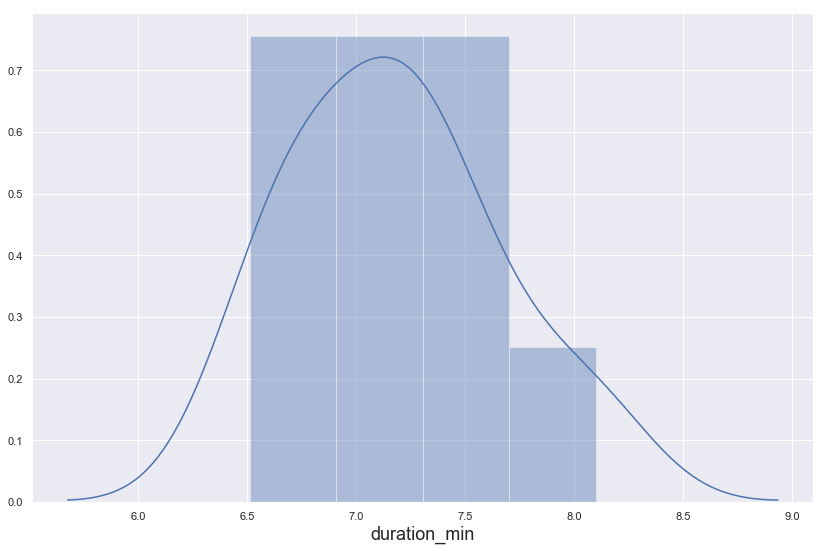

In [27]:
sns.distplot((df.duration_ms/1000.0)/60.0)
plt.xlabel('duration_min',fontsize=18)

### other features distributions

C:\Users\orenz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


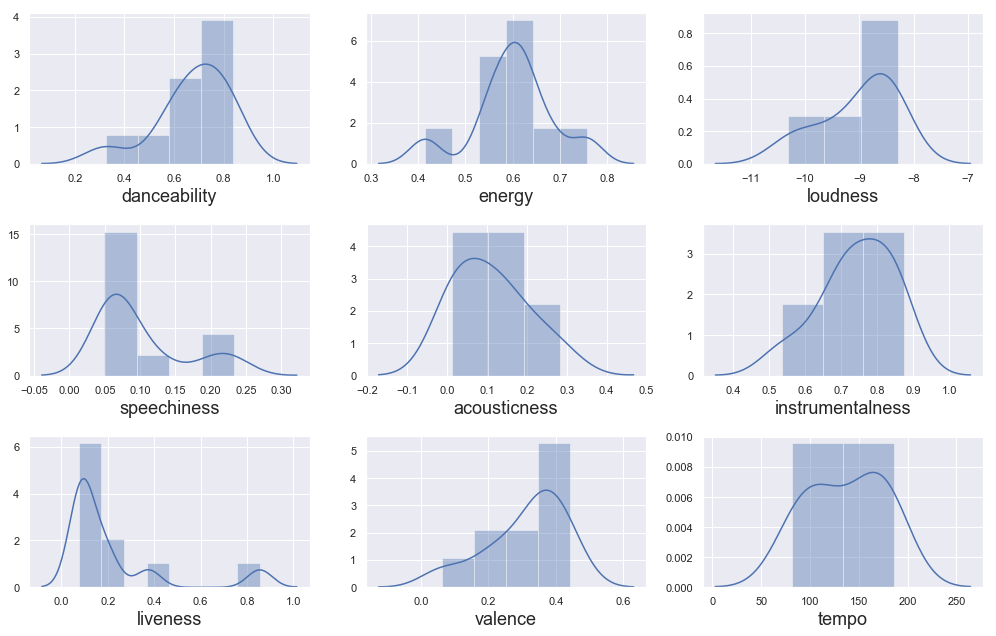

In [28]:
plt.subplot(331)
sns.distplot(df.danceability)
plt.xlabel('danceability', fontsize=18)

plt.subplot(332)
sns.distplot(df.energy)
plt.xlabel('energy', fontsize=18)

plt.subplot(333)
sns.distplot(df.loudness)
plt.xlabel('loudness', fontsize=18)

plt.subplot(334)
sns.distplot(df.speechiness)
plt.xlabel('speechiness', fontsize=18)

plt.subplot(335)
sns.distplot(df.acousticness)
plt.xlabel('acousticness', fontsize=18)

plt.subplot(336)
sns.distplot(df.instrumentalness)
plt.xlabel('instrumentalness', fontsize=18)

plt.subplot(337)
sns.distplot(df.liveness)
plt.xlabel('liveness', fontsize=18)

plt.subplot(338)
sns.distplot(df.valence)
plt.xlabel('valence', fontsize=18)

plt.subplot(339)
sns.distplot(df.tempo)
plt.xlabel('tempo', fontsize=18)

plt.tight_layout()
plt.show()


In [29]:
df.to_csv('mantismash_tracks_data.csv')